In [31]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

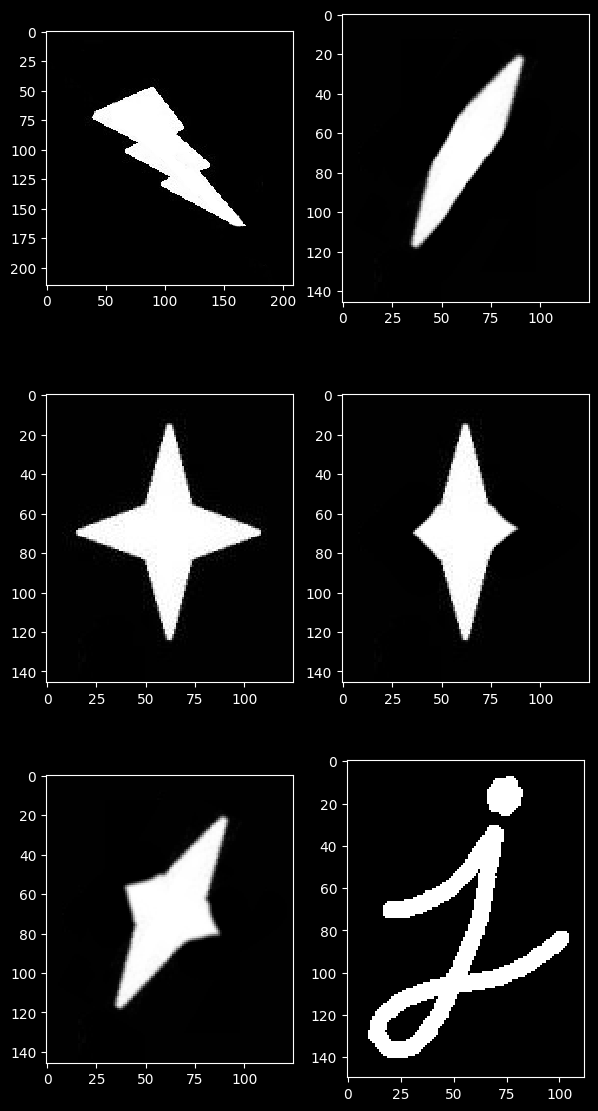

In [32]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none')
fig.set_size_inches(7,14)
plt.show()

In [33]:
intensity_values = set(lightningbolt.flatten())
print("Number of Unique Intensity Values: ", len(intensity_values))

Number of Unique Intensity Values:  75


## Question:

What would you expect the intensity value to be of the lightning bolt, visually? What explains the actual value?

## Answer

We would expect the intensity value to be 255, which is the white in grayscale. The actual value variability could be due to different lighting conditions, compression artifacts, or other noise. 

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

Number of Unique Intensity Values:  2


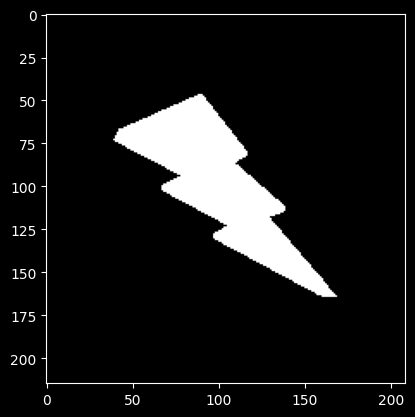

In [34]:
_, lightningbolt_binary = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt_binary.flatten())
print("Number of Unique Intensity Values: ", len(intensity_values))

plt.imshow(lightningbolt_binary, cmap='gray')
plt.show()

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why? To investigate, manipulate the lower value (currently set to 200) in:
```
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)
```

## Answer
When the above values are used for thresholding, the pixels with intensity values within the given range are set to 1 and while every other pixel (outside of the range) si set to 0. Therefore, there is no longer any variabiliy, there are just two different intensity values. A good value (minimum value in the acceptable range) would be anything higher than 30, and less than 200. This is because the values outside of the lightning bolt are generally less than 30 and more than 200. So, either approach works similarly. 


# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

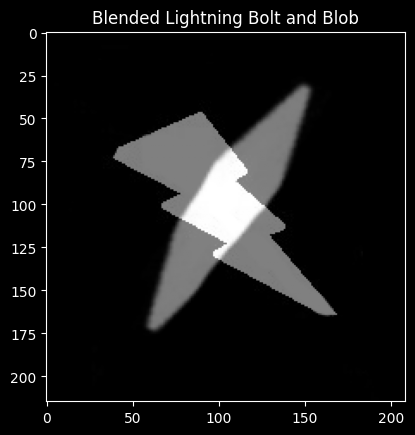

In [35]:
blob_resized = cv2.resize(blob, (lightningbolt.shape[1], lightningbolt.shape[0]))
blend = cv2.addWeighted(lightningbolt,0.5,blob_resized,0.5,0)
plt.imshow(blend, cmap='gray')
plt.title('Blended Lightning Bolt and Blob')
plt.show()

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

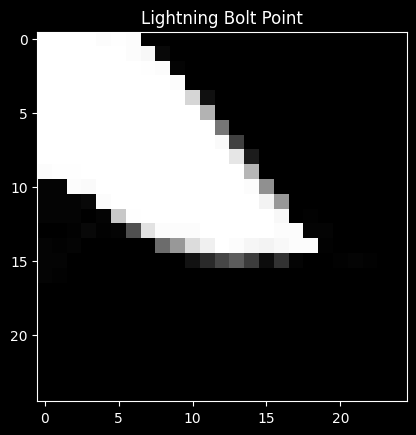

In [36]:
point = blend[150:175, 150:175]
plt.title('Lightning Bolt Point')
plt.imshow(point, cmap='gray')
plt.show()

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

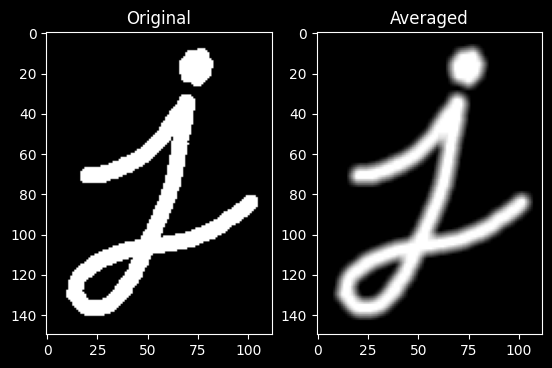

In [37]:
letterj_blur = cv2.blur(letterj,(5,5))
plt.subplot(121)
plt.imshow(letterj, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(letterj_blur, cmap='gray')
plt.title('Averaged')
plt.show()

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

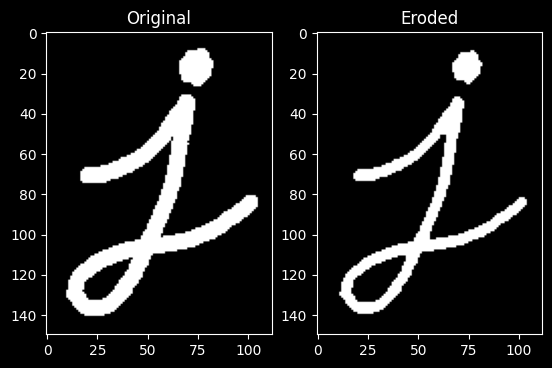

In [38]:
kernel = np.ones((3,3),np.uint8)
letterj_erode = cv2.erode(letterj,kernel,iterations = 1)
plt.subplot(121)
plt.imshow(letterj, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(letterj_erode, cmap='gray')
plt.title('Eroded')
plt.show()

## 5. Perform erosion on j with a 5x5 kernel

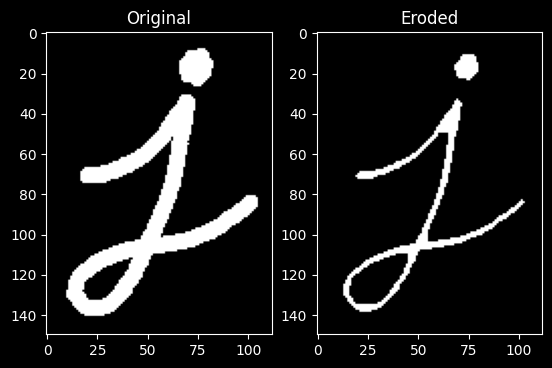

In [39]:
kernel = np.ones((5,5),np.uint8)
letterj_erode = cv2.erode(letterj,kernel,iterations = 1)
plt.subplot(121)
plt.imshow(letterj, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(letterj_erode, cmap='gray')
plt.title('Eroded')
plt.show()

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



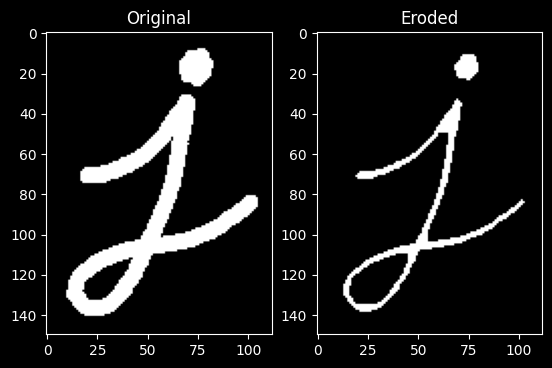

In [40]:
kernel = np.ones((3,3),np.uint8)
letterj_erode = cv2.erode(letterj,kernel,iterations = 2)
plt.subplot(121)
plt.imshow(letterj, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(letterj_erode, cmap='gray')
plt.title('Eroded')
plt.show()

## 7. Perform dilation on j with a 3x3 kernel

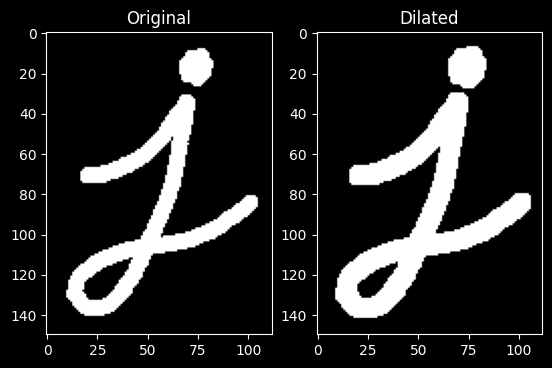

In [41]:
kernel = np.ones((3,3),np.uint8)
letterj_dilate = cv2.dilate(letterj,kernel,iterations = 1)
plt.subplot(121)
plt.imshow(letterj, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(letterj_dilate, cmap='gray')
plt.title('Dilated')
plt.show()

## 8. Perform dilation on j with a 5x5 kernel

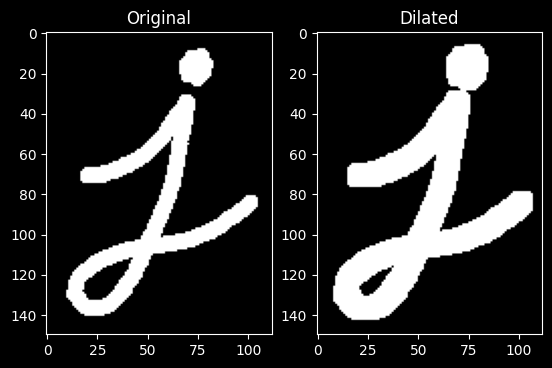

In [42]:
kernel = np.ones((5,5),np.uint8)
letterj_dilate = cv2.dilate(letterj,kernel,iterations = 1)
plt.subplot(121)
plt.imshow(letterj, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(letterj_dilate, cmap='gray')
plt.title('Dilated')
plt.show()

## 9. What is the effect of kernel size on morphology operations?

## Answer

Larger kernel sizes produce a bigger effect on the image, dialting or eroding by a bigger factor. Larger kernel sizes also lose more of the finer details of the image. 

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

## Answer

Repeated operations with smaller kernel sizes preserve more of the finer details of the image, while the single operations with the larger kernel size loses more of the details with one blunt operation.

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

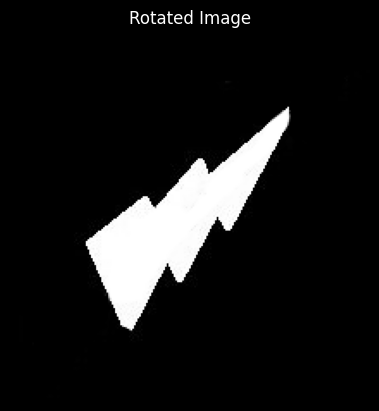

In [43]:
rows, cols = lightningbolt.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(lightningbolt, M, (cols, rows))

plt.imshow(dst, cmap='gray')
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. 

Is Exercise 1 the best way to blend the images? Are there other options? How could you account for the relative size of the images?

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end. You should also have another approach to Exercise 1.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

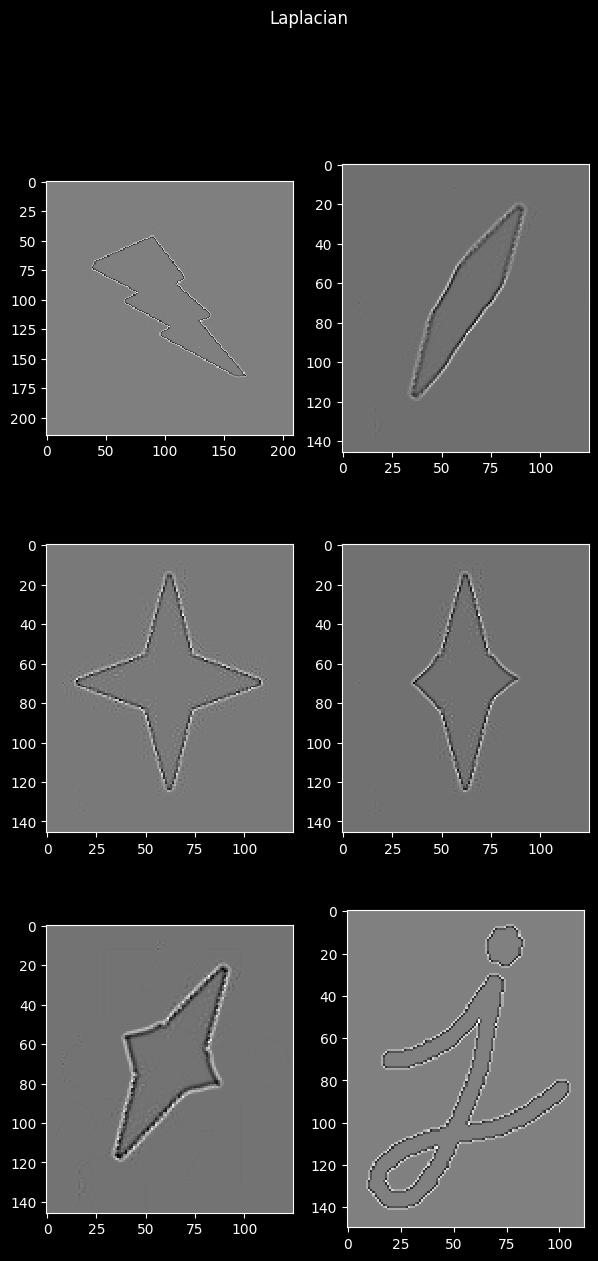

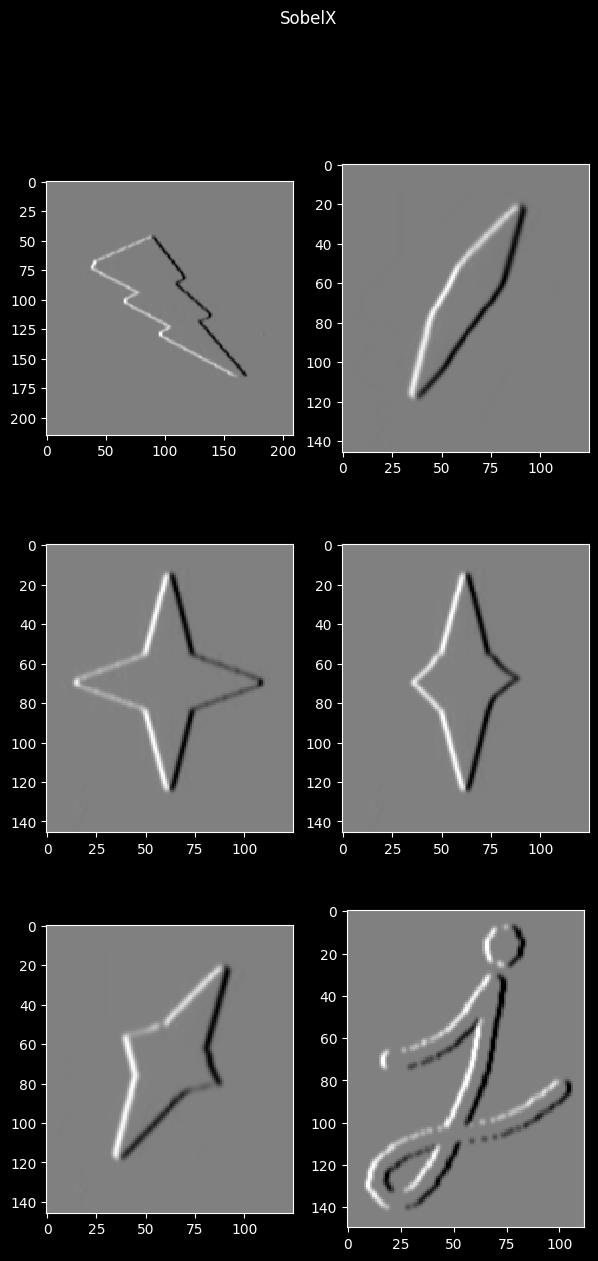

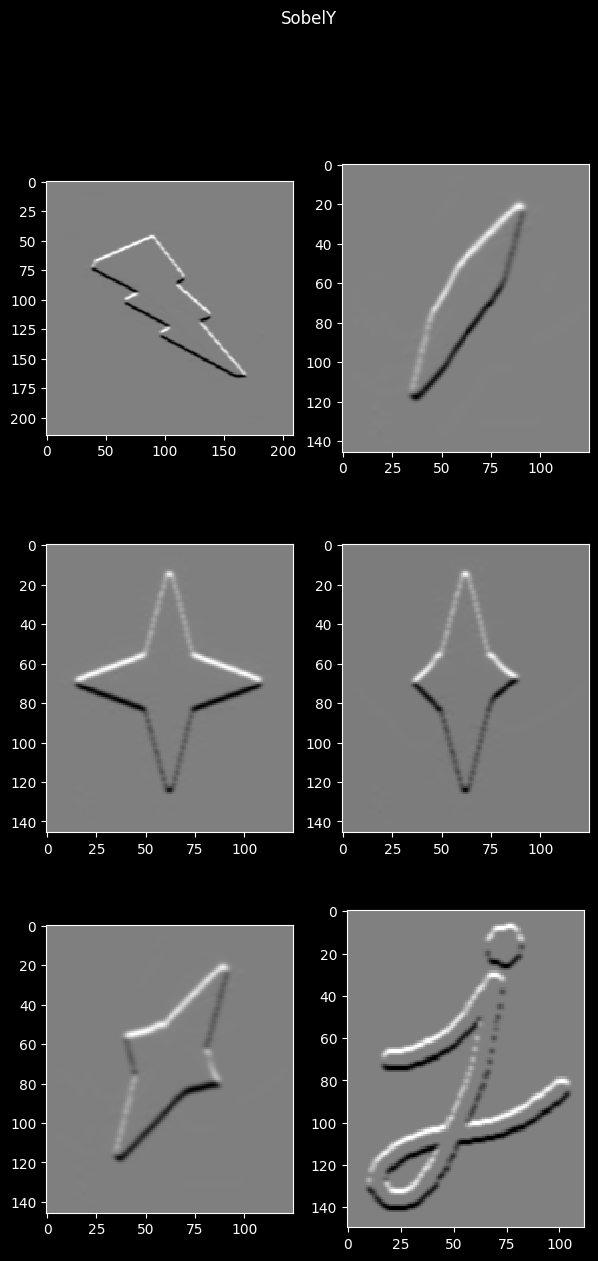

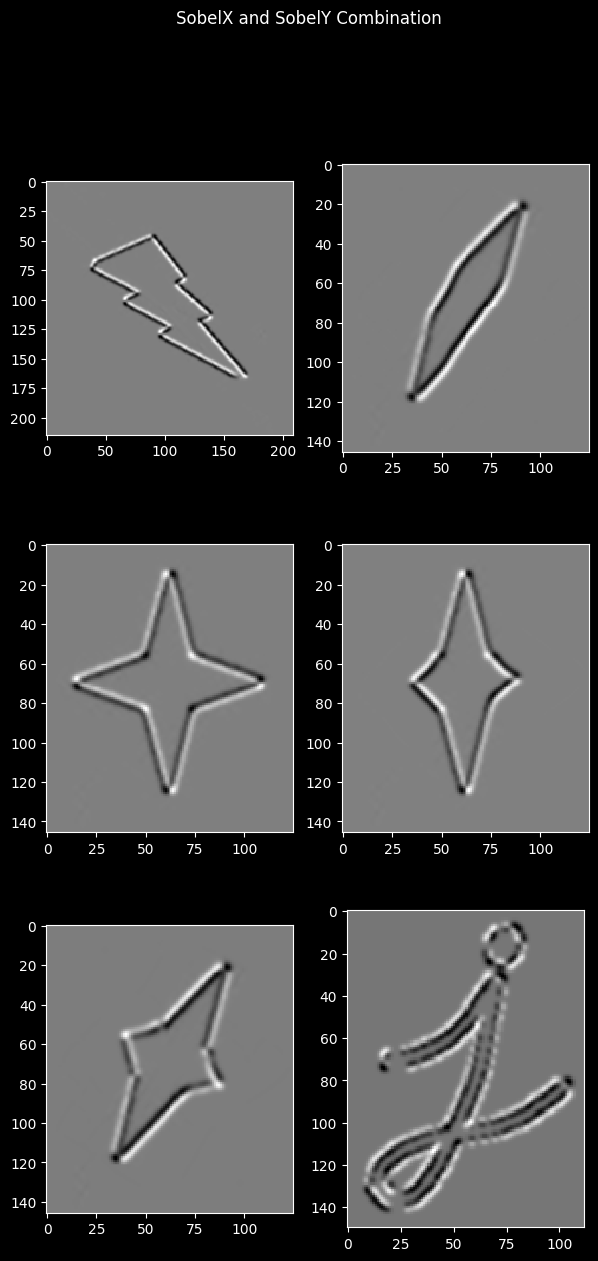

In [44]:
''' Laplacian, Sobel X, Sobel Y, and Combination '''
# Looping through images and applying operations
images_laplacian = [None] * len(images)
images_sobelx = [None] * len(images)
images_sobely = [None] * len(images)
images_sobelxy = [None] * len(images)
for i, image in enumerate(images):
    images_laplacian[i] = cv2.Laplacian(image,cv2.CV_64F)
    images_sobelx[i] = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
    images_sobely[i] = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
    images_sobelxy[i] = cv2.Sobel(images_sobelx[i],cv2.CV_64F,0,1,ksize=5)

# Plotting results of Laplacian
fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images_laplacian):
    a.imshow(i, cmap='gray', interpolation='none')
fig.set_size_inches(7,14)
fig.suptitle('Laplacian')
plt.show()

# Plotting results of SobelX
fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images_sobelx):
    a.imshow(i, cmap='gray', interpolation='none')
fig.set_size_inches(7,14)
fig.suptitle('SobelX')
plt.show()

# Plotting results of SobelY
fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images_sobely):
    a.imshow(i, cmap='gray', interpolation='none')
fig.set_size_inches(7,14)
fig.suptitle('SobelY')
plt.show()

# Plotting results of SobelX and SobelY Combination
fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images_sobelxy):
    a.imshow(i, cmap='gray', interpolation='none')
fig.set_size_inches(7,14)
fig.suptitle('SobelX and SobelY Combination')
plt.show()

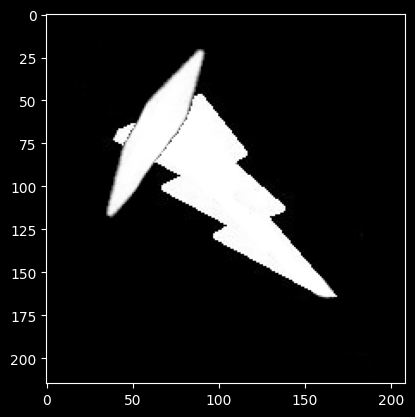

In [45]:
''' Improvement to Exercise 1 '''
# We are account for the different size of the iamges and superimpose them where appropriate.
rows, cols = blob.shape
roi = lightningbolt[0:rows, 0:cols]
ret, mask = cv2.threshold(blob, 40, 355, cv2.THRESH_BINARY)
mask_inv =cv2.bitwise_not(mask)
lightningbolt_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
blob_fg = cv2.bitwise_and(blob, blob, mask=mask)
dst = cv2.add(lightningbolt_bg, blob_fg)
lightningbolt[0:rows, 0:cols] = dst
plt.imshow(lightningbolt, cmap='gray')
plt.show()

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 